__Research Q:__ <br> Out of all accidents that occur in intersections what is the distribution of accidents by intersection type?

<li>What percentage of accidents will be at irregular intersections?

In [28]:
import missingno as msno

import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [29]:
accidentsdf = pd.read_csv('Multnomah.csv',low_memory=False)

In [ ]:
msno.matrix(accidentsdf,color=(.3, .3, .5))

In [16]:
accidentsdf['Intersection Type'].unique()

array([' ', nan, '1', '3', '5', '4', '6', '2', '0'], dtype=object)

In [39]:
usedcol = ['Crash Type','Collision Type','Median Type','Crash Severity','Intersection Type','Crash ID',
           'Crash Year','Nearest Intersecting Street Number']
accidentsdf = accidentsdf[usedcol].dropna().reset_index()
# accidentsdf.columns = ['Old Index','Crash Type','Collision Type','Crash Severity','Intersection Type','Crash ID','Crash Year','']
accidentsdf.to_csv('accidentintersections.csv')

In [40]:
accidentsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54208 entries, 0 to 54207
Data columns (total 8 columns):
index                                 54208 non-null int64
Crash Type                            54208 non-null object
Collision Type                        54208 non-null object
Crash Severity                        54208 non-null float64
Intersection Type                     54208 non-null object
Crash ID                              54208 non-null int64
Crash Year                            54208 non-null float64
Nearest Intersecting Street Number    54208 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ MB


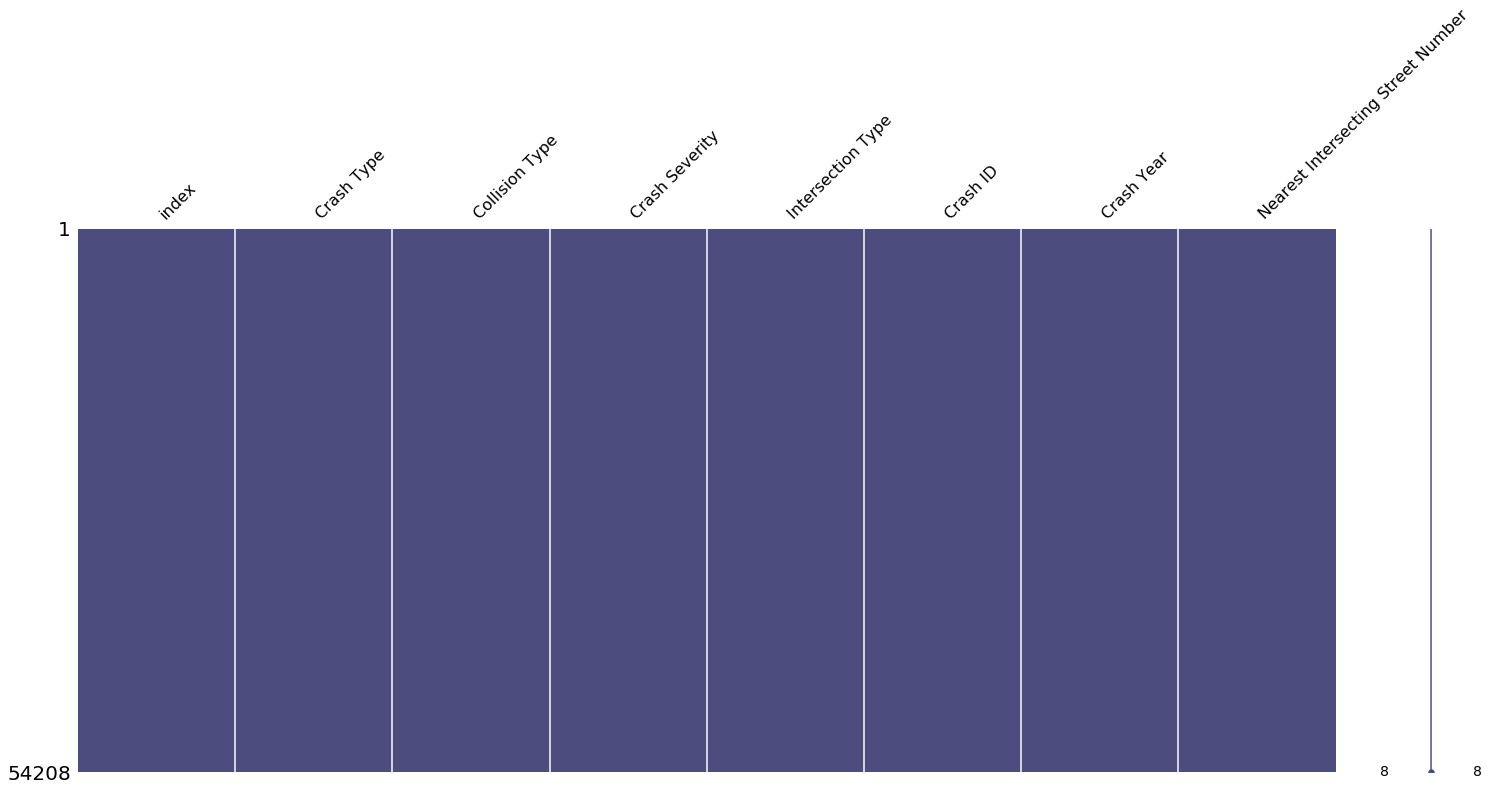

In [41]:
msno.matrix(accidentsdf,color=(.3, .3, .5))
plt.show()

In [42]:
types = dict(accidentsdf['Intersection Type'].value_counts())

In [43]:
types

{' ': 27127,
 '1': 18011,
 '3': 7300,
 '5': 860,
 '4': 655,
 '6': 155,
 '0': 57,
 '2': 43}

In [23]:
k = list(types.keys())
i = list(types.values())

<BarContainer object of 7 artists>

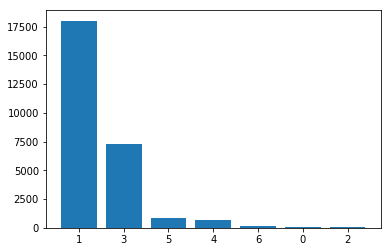

In [26]:
plt.bar(x=k[1:],height=i[1:])
plt.show()

In [93]:
accidentsdf.head()

,index,Crash Type,Collision Type,Crash Severity,Intersection Type,Crash ID,Crash Year,Nearest Intersecting Street Number
0,0,8,9,5.0,,1449628,2012.0,5142
1,5,3,0,4.0,,1449632,2012.0,5111
2,9,2,5,5.0,1,1449640,2012.0,5112
3,14,B,1,4.0,1,1449642,2012.0,5102
4,20,2,5,5.0,,1449649,2012.0,5079


In [61]:
accidentsdf[accidentsdf['Nearest Intersecting Street Number'] == '9101']

,index,Crash Type,Collision Type,Crash Severity,Intersection Type,Crash ID,Crash Year,Nearest Intersecting Street Number
27,132,E,3,4.0,,1449739,2012.0,9101
28,139,E,3,4.0,3,1449740,2012.0,9101
179,921,8,9,4.0,,1450333,2012.0,9101
2195,11442,8,9,4.0,,1458966,2012.0,9101
3426,17871,C,5,5.0,,1463601,2012.0,9101
3874,20237,E,3,5.0,6,1465644,2012.0,9101
4222,22056,C,5,4.0,,1467457,2012.0,9101
4338,22663,E,3,4.0,,1467979,2012.0,9101
4667,24405,E,3,5.0,1,1469779,2012.0,9101
5036,26310,E,3,4.0,,1470895,2012.0,9101


In [62]:
accidentsdf['Crash Type'].unique()

array(['8', '3', '2', 'B', 'E', 'C', 'H', '6', 'A', 'F', 'D', '7', 'G',
       '9', 'J', 'I', '&', '0', '4', '1'], dtype=object)

In [87]:
intertype = [accidentsdf['Intersection Type'][accidentsdf['Crash Type'] == s] for s in list(accidentsdf['Crash Type'].unique())]

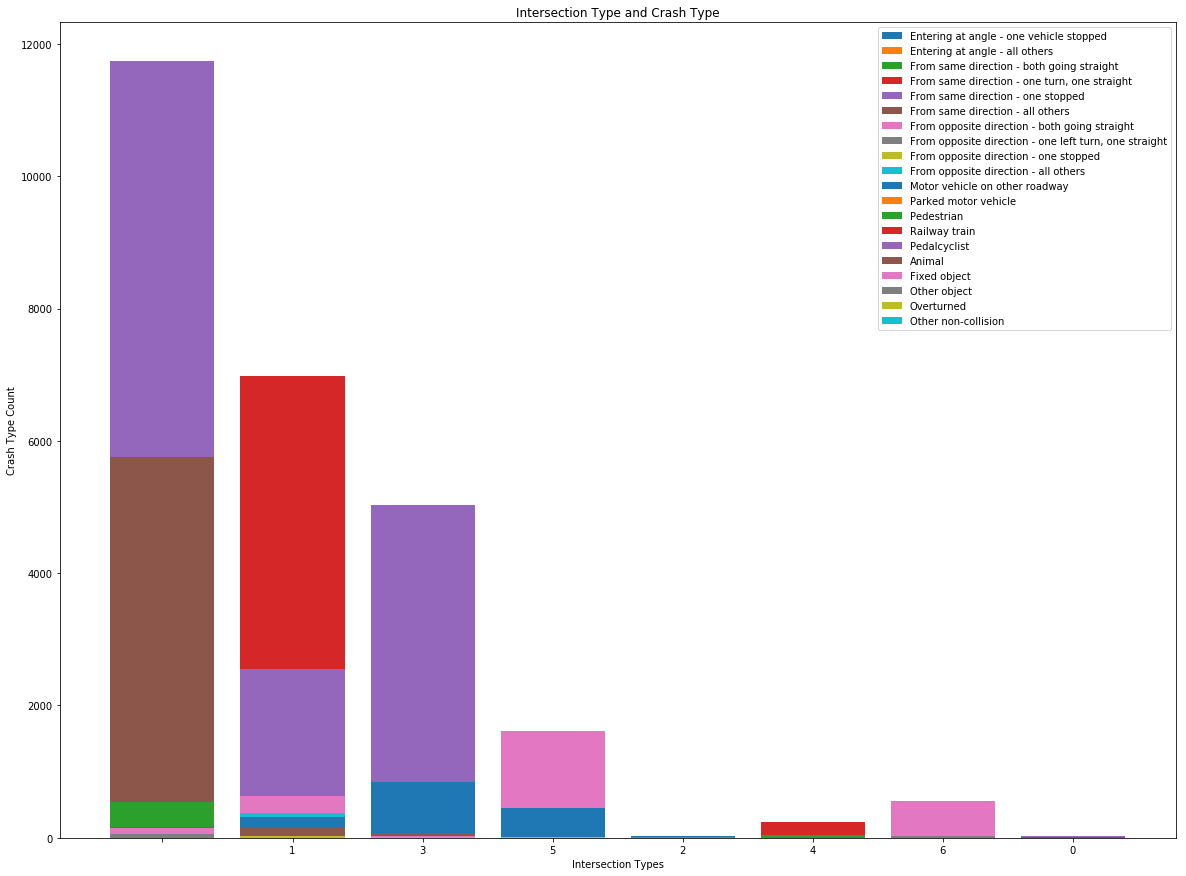

In [92]:
plt.figure(figsize=(20,15))
for b in intertype:
    x = list(b.unique())
    y = (list(b.value_counts()))
    plt.bar(x,y)
    plt.legend(ct.values())
plt.title('Intersection Type and Crash Type')
plt.xlabel('Intersection Types')
plt.ylabel('Crash Type Count')
plt.savefig('IntersectionCrash.png')
plt.show()

In [89]:
ct = {}

ct['A']='Entering at angle - one vehicle stopped'
ct['B']='Entering at angle - all others'
ct['C']='From same direction - both going straight'
ct['D']='From same direction - one turn, one straight'
ct['E']='From same direction - one stopped'
ct['F']='From same direction - all others'
ct['G']='From opposite direction - both going straight'
ct['H']='From opposite direction - one left turn, one straight'
ct['I']='From opposite direction - one stopped'
ct['J']='From opposite direction - all others'
ct['1']='Motor vehicle on other roadway'
ct['2']='Parked motor vehicle'
ct['3']='Pedestrian'
ct['4']='Railway train'
ct['6']='Pedalcyclist'
ct['7']='Animal'
ct['8']='Fixed object'
ct['9']='Other object'
ct['&']='Overturned'
ct['0']='Other non-collision'